## Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [6]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):
    for n in range(nt):
      un[:] = u[:]
      for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    return 0

## Numba accelerator

In [7]:
@njit(fastmath=True)
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):
    for n in range(nt):
          un[:] = u[:]
          for i in range(1, nx):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    return 0

## Pyccel accelerator

In [14]:
def solve_1d_nonlinearconv_pyccel(u:'float[:]', un:'float[:]', nt:'int', nx:'int', dt:'float', dx:'float'):
    for n in range(nt):
      un[:] = u[:]
      for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    return 0

## Inputs

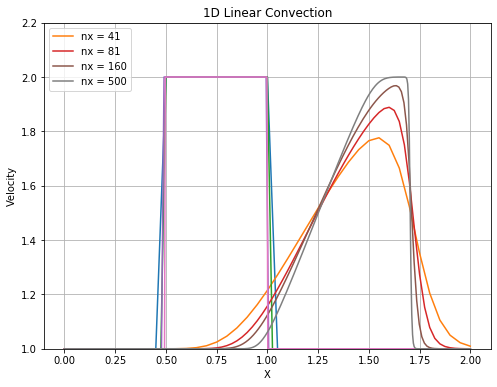

In [53]:
nx_vect = [41,81,160,500]  # try changing this number from 41 to 81 and Run All ... what happens?
plt.figure(figsize=(8, 6))
for nx in nx_vect:    
    dx = 2 / (nx-1)
    nt = 500   #nt is the number of timesteps we want to calculate
    dt = 0.001
    grid = np.linspace(0,2,nx) # creating the space grid    

    u0 = np.ones(nx)      #numpy function ones()
    u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
    plt.plot(grid,u0)
    u = u0.copy()
    un = np.ones(nx)

    solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
    #Plotting data
    plt.plot(grid,u,label="nx = "+str(nx));
    plt.ylim([1.,2.2])
    plt.xlabel('X')
    plt.ylabel('Velocity')    
    plt.title('1D Linear Convection')
plt.legend(loc='best')
plt.grid()
plt.show()


## <font color='orange'>We notice that the smaller $nx$, the larger the numerical diffusion 

## Call Funtions

### Pure function

In [23]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

181 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [24]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

120 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Function with pyccel accelerator

In [25]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [26]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

349 µs ± 1.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
